## '한국 복지 패널 데이터'를 이용한 데이터 분석
### 지역별 연령대 비율 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize': "8, 6"})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

pd.set_option('display.max_rows', 100)     # 행은 최대 100까지 출력
pd.set_option('display.max_columns', None) # 열은 무제한 출력

raw = pd.read_spss('./Koweps_hpwc17_2022_beta1.sav');
print(type(raw))

# 1~17차 머지데이터_변수명.xlsx
raw=raw.rename(
columns={'h17_g3'     : 'gender',         #  성별, 1: 남, 2: 여
         'h17_g4'     : 'birth',          #  태어난 연도
         'h17_g10'    : 'marriage_type',  #  혼인 상태
         'h17_g11'    : 'religion',       #  종교, 1: 있음, 2: 없음
         'p1702_8aq1' : 'income',         #  일한달의 월 평균 임금 
         'h17_eco9'   : 'code_job',       #  직업 코드
         'h17_reg7'   : 'code_region'})   #  7개 권역별 지역구분

# 직종 코드 확인
# list_job=pd.read_excel('./Koweps_Codebook_2022.xlsx', sheet_name='직종코드')
# print(type(list_job))
# print(list_job.head(5))

# 직종의 merge
# raw=raw.merge(list_job, how='left', on='code_job')
# raw[['code_job', 'job']].head(5)

# 성별 변경
# raw['gender'] = np.where(raw['gender'] == 1, 'male', 'female')
# raw['gender'].head(3)

# 연령
raw=raw.assign(age=((2023-raw['birth']))) # 만나이

# 연령대 파생 변수 제작
# age < 30: young, age < 60: middle, old
raw=raw.assign(ageg=np.where(raw['age'] < 30, 'young', np.where(raw['age'] < 60, 'middle', 'old')))

# marriage 파생 변수 제작
# 1: 유배우, 3: 이혼 -> 1: marriage, 2: divorce, 3: etc
# def marrage(x):
#     sw=''
#     if x==1:
#         sw='marriage'
#     elif x==3:
#         sw='divorce'
#     else:
#         sw='etc'
        
#     return sw

# raw['marriage']=raw['marriage_type'].apply(marrage)

plt.rcParams.update({'figure.figsize': "6, 4"})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<class 'pandas.core.frame.DataFrame'>


In [3]:
df=raw.copy()
print(type(df['code_region']))
print(df['code_region'].value_counts()) # 설문에 응한 사람들 지역별 인원수

<class 'pandas.core.series.Series'>
code_region
2.0    3617
7.0    2988
3.0    2842
4.0    1969
1.0    1957
5.0    1783
6.0    1435
Name: count, dtype: int64


In [4]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [6]:
df2=df.merge(list_region, how='left', on='code_region') # code_region을 이용하여 left outer join
df2.head(3)

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,p17_wgl,p17_wsc_all,p17_wsl_all,p17_wgc_all,p17_wgl_all,p17_wsc_n_all,p17_wsl_n_all,p17_wgc_n_all,p17_wgl_n_all,h17_reg5,code_region,h17_din,h17_cin,h17_flag,h17_hc,h17_hc_all,h17_hc_n_all,nh1701_1,nh1701_2,h1701_1,h17_pind,h17_pid,h17_g1,h17_g2,gender,birth,h17_g6,h17_g7,h17_g8,h17_g9,marriage_type,religion,h17_g12,h1701_110,h1701_11aq2,h1701_11aq3,h1701_11aq5,h1701_11aq6,h1701_11aq8,h1701_11aq10,h17_med1,h17_med2,h17_med3,h17_med4,h17_med5,h17_med6,h17_med7,h17_med8,h17_g9_1,h17_med9,h17_med10,h17_eco1,h17_eco2,h17_eco3,h17_eco4,h17_eco4_1,h17_eco5_1,h17_eco6,h17_eco_7_1,h17_eco_7_2,h17_eco_7_3,h17_eco8,code_job,h17_eco10,h17_eco11,h17_soc1,h17_soc_2,h17_soc_3,h17_soc_4,h17_soc_5,h17_soc_6,h17_soc_7,h17_soc_8,h17_soc_9,h17_soc_10,h17_soc_11,h17_soc8,h17_soc9,h17_soc11,h17_soc10,h17_soc_12,h17_soc_13,h1705_1,h1705_3aq1,h1705_2,h1705_3,h1705_4,h1705_5,h1705_6,h1705_7,nh1705_8,nh1705_9,h1705_3aq2,h1706_aq1,h1706_14aq1,h1706_1,h1706_2,h1706_4,h1706_5,h1706_3,h1706_3_16aq1,h1706_6,h1706_8,h1706_9,h1706_aq2,h1706_aq3,h1706_10,h1706_11,h1706_12,h1706_13,h1706_14,h1706_15,h1706_21,h1706_22,h1706_23,h1706_24,h1706_25,h1706_27,h1706_30,h1706_33,h1706_36,h1706_39,h1706_14aq2,h1706_3aq1,h1707_3aq1,h1707_3aq2,h1707_5aq1,h1707_3aq3,h1707_sub1,h1707_3aq4,h1707_3aq5,h1707_6aq1,h1707_3aq6,h1707_5aq2,h1707_3aq7,h1707_3aq8,h1707_3aq9,h1707_3aq10,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq13,h1707_6aq4,h1707_6aq6,h1707_13aq1,h1707_3aq14,h1707_3aq15,h1707_3aq16,h1707_3aq17,h1707_4,h1707_6aq7,h1707_6aq8,h1707_6aq9,h1707_6aq10,h1707_6aq11,h1707_5,h1707_6aq12,h1707_6aq13,h1707_6aq14,h1707_9,h17_inc1,h17_inc2_1,h17_inc2_2,h17_inc3_1,h17_inc3_2,h17_inc4_1,h17_inc4_2,h17_inc5_1,h17_inc5_2,h17_inc6_1,h17_inc6_2,h17_inc7_1,h17_inc7_2,h1708_106,h1708_107,h1708_108,h1708_109,h1708_110,h1708_111,h17_inc2_3,h17_inc2,h17_inc3_6,h17_inc3,h17_inc4_7,h17_inc4,h17_inc4_8,h17_inc4_9,h1708_155,h1708_156,h1708_157,h1708_158,h1708_160,h1708_159,h1708_3aq3,h1708_161,h1708_162,h1708_163,h1708_164,h1708_166,h1708_165,h1708_3aq4,h1708_167,h1708_168,h1708_169,h1708_170,h17_inc7_3,h17_inc7,h1708_aq9,h1708_aq10,h1708_aq11,h1708_aq12,h1708_14aq1,h1708_14aq2,h1708_aq13,h1708_aq14,h1708_aq15,h1708_6aq1,h1708_aq16,h1708_10aq1,h1708_aq19,h1708_aq20,h1708_aq21,h1708_5aq3,h1708_14aq3,h1708_aq22,h1708_aq23,h1708_aq24,h1708_4aq116,h1708_4aq117,h1708_5aq1,h1708_11aq1,h1708_7aq4,h1708_7aq6,h1708_7aq8,h1708_aq25,h1708_15aq1,h1708_16aq1,h1708_aq26,h1708_aq27,h1708_aq28,h1708_aq29,h1708_3aq5,h1708_4aq118,h1708_aq30,h1708_6aq3,h1708_3aq6,h1708_3aq7,nh1708_3aq1,h1708_aq32,h1708_aq33,h1708_aq34,h1708_11aq2,h1708_11aq3,h1708_11aq4,h1708_11aq5,h1708_11aq7,h1708_11aq8,h1709_aq1,h1709_aq2,h1709_aq3,h1709_aq4,h1709_aq5,h1709_aq6,h1709_aq7,h1709_aq8,h1709_12aq1,h1709_12aq2,h1709_12aq3,h1709_12aq4,h1709_12aq5,h1709_12aq6,h1709_12aq7,h1709_12aq11,h1709_12aq21,h1709_12aq31,h1709_12aq41,h1709_12aq51,h1709_12aq61,h1709_12aq71,h1710_aq1,h1710_aq2,h1710_aq3,h1710_aq4,h1710_aq5,h1710_aq6,h1710_aq7,h1710_aq8,h1710_aq9,h1710_aq10,h1710_aq11,h1710_aq12,h1710_aq13,h1710_aq14,h1710_aq15,h1710_aq16,h1710_aq17,h1710_aq18,h1710_aq19,h1710_aq20,h1710_26,h1710_27,h1710_aq23,h1710_aq24,h1710_aq25,h1710_aq26,h1711_2,h1711_3,h1711_4,h1711_5,h1711_6,h1711_7,h1711_8,h1711_3aq1,h1711_3aq2,h1711_3aq3,h1711_3aq4,h1711_3aq5,h1711_3aq6,h1711_3aq7,h1712_2_11aq1,h1712_2_11aq2,h1712_2_11aq3,h1712_2_11aq4,h1712_2_11aq5,h1712_2_11aq6,h1712_2_11aq7,h1712_2_11aq8,h1712_2_11aq9,h1712_2_11aq10,h1712_2_11aq11,h1712_2_11aq12,h1712_2_11aq13,h1712_2_11aq14,h1712_2_11aq15,h1712_2_11aq16,h1712_2_12aq1,h1712_2_11aq17,h1712_2_12aq2,h1712_2_11aq18,h1712_2_12aq3,h1712_2_11aq19,h1712_2_12aq4,h1712_2_11aq20,h1712_2_12aq5,h1712_2_11aq21,h1712_2_12aq6,h1712_2_11aq23,h1712_2_12aq7,h1712_2_11aq24,h1712_2_12aq8,h1712_2_11aq25,h1712_2_12aq9,h1712_2_11aq26,h1712_2_12aq10,h1712_2_11aq27,h1712_2_12aq11,h1712_2_11aq28,h1712_2_12aq12,h1712_2_11aq30,h1712_2_12aq13,h1712_2_11aq

In [15]:
# 지역별 연령대 비율 분석
df3=df2.groupby(['region', 'ageg'], as_index=True)['ageg'].size()
print(type(df3))
print(df3)

<class 'pandas.core.series.Series'>
region        ageg  
강원/충북         middle     393
              old        797
              young      245
광주/전남/전북/제주도  middle     845
              old       1554
              young      589
대구/경북         middle     536
              old       1122
              young      311
대전/충남         middle     540
              old        863
              young      380
부산/경남/울산      middle     890
              old       1384
              young      568
서울            middle     708
              old        860
              young      389
수도권(인천/경기)    middle    1332
              old       1370
              young      915
Name: ageg, dtype: int64


In [16]:
df3=round(df3.groupby(level=[0]).apply(lambda x: x/x.sum()), 3)*100
df3

region        region        ageg  
강원/충북         강원/충북         middle    27.4
                            old       55.5
                            young     17.1
광주/전남/전북/제주도  광주/전남/전북/제주도  middle    28.3
                            old       52.0
                            young     19.7
대구/경북         대구/경북         middle    27.2
                            old       57.0
                            young     15.8
대전/충남         대전/충남         middle    30.3
                            old       48.4
                            young     21.3
부산/경남/울산      부산/경남/울산      middle    31.3
                            old       48.7
                            young     20.0
서울            서울            middle    36.2
                            old       43.9
                            young     19.9
수도권(인천/경기)    수도권(인천/경기)    middle    36.8
                            old       37.9
                            young     25.3
Name: ageg, dtype: float64

In [17]:
df3 = df3.droplevel(axis=0, level=0)  # 첫번째 multi index 삭제
df3

region        ageg  
강원/충북         middle    27.4
              old       55.5
              young     17.1
광주/전남/전북/제주도  middle    28.3
              old       52.0
              young     19.7
대구/경북         middle    27.2
              old       57.0
              young     15.8
대전/충남         middle    30.3
              old       48.4
              young     21.3
부산/경남/울산      middle    31.3
              old       48.7
              young     20.0
서울            middle    36.2
              old       43.9
              young     19.9
수도권(인천/경기)    middle    36.8
              old       37.9
              young     25.3
Name: ageg, dtype: float64

In [18]:
df4=pd.DataFrame(df3).rename(columns={'ageg': 'proportion'}).reset_index()
df4

,region,ageg,proportion
0,강원/충북,middle,27.4
1,강원/충북,old,55.5
2,강원/충북,young,17.1
3,광주/전남/전북/제주도,middle,28.3
4,광주/전남/전북/제주도,old,52.0
5,광주/전남/전북/제주도,young,19.7
6,대구/경북,middle,27.2
7,대구/경북,old,57.0
8,대구/경북,young,15.8
9,대전/충남,middle,30.3


In [46]:
# index의 값을 변경하는 방법
# df3.rename({'1young':'young', '2middle':'middle', '3old':'old'})

In [43]:
# 특정 컬럼의 값 변경
# df4['ageg']=df4['ageg'].replace({'1young':'young', '2middle':'middle', '3old':'old'})
# df4

,region,ageg,proportion
0,강원/충북,young,23.2
1,강원/충북,middle,30.9
2,강원/충북,old,45.9
3,광주/전남/전북/제주도,young,23.3
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,old,44.9
6,대구/경북,young,20.0
7,대구/경북,middle,29.6
8,대구/경북,old,50.4
9,대전/충남,young,25.0


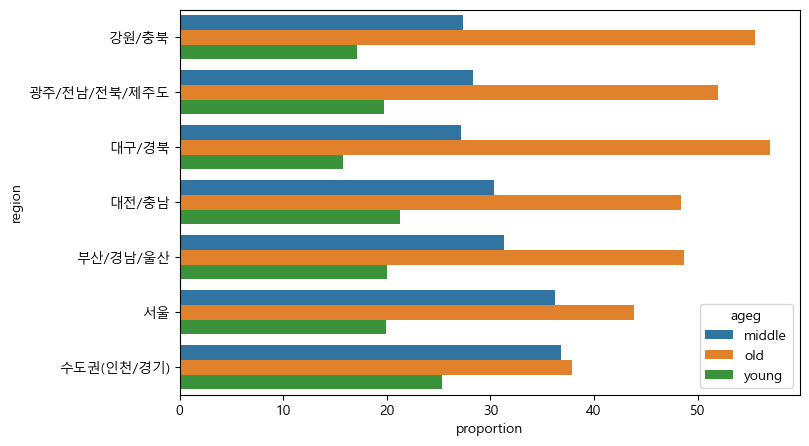

In [21]:
plt.rcParams.update({'figure.figsize': "8, 5"})
sns.barplot(data=df4, y='region', x='proportion', hue='ageg');

In [ ]:
# ERROR
# sns.barplot(data=df4, y='region', x='proportion', hue='ageg', order=['young', 'middle', 'old']);

### pivot
- 행(index, 제1 그룹),열(제 2그룹), 데이터(데이터 컬럼)로 요약 테이블을 생성해줌

In [24]:
# index='region': 행 그룹, columns='ageg': ageg 컬럼의 값을 열 그룹으로 사용, values='proportion': 값 컬럼 명시
pivot_df=df4.pivot(index='region', columns='ageg', values='proportion')
# print(type(pivot_df))
display(pivot_df)

ageg,middle,old,young
region,,,
강원/충북,27.4,55.5,17.1
광주/전남/전북/제주도,28.3,52.0,19.7
대구/경북,27.2,57.0,15.8
대전/충남,30.3,48.4,21.3
부산/경남/울산,31.3,48.7,20.0
서울,36.2,43.9,19.9
수도권(인천/경기),36.8,37.9,25.3


In [25]:
print(pivot_df.index)

Index(['강원/충북', '광주/전남/전북/제주도', '대구/경북', '대전/충남', '부산/경남/울산', '서울',
       '수도권(인천/경기)'],
      dtype='object', name='region')


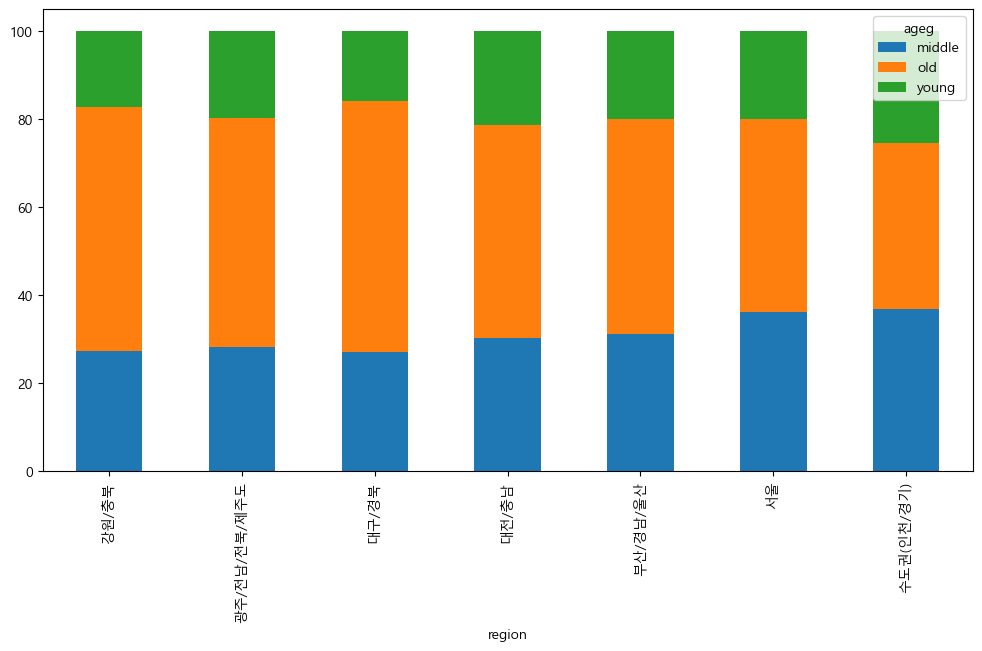

In [29]:
plt.rcParams.update({'figure.figsize': "12, 6"})
pivot_df.plot.bar(stacked=True); # 정렬 적용 안한 경우

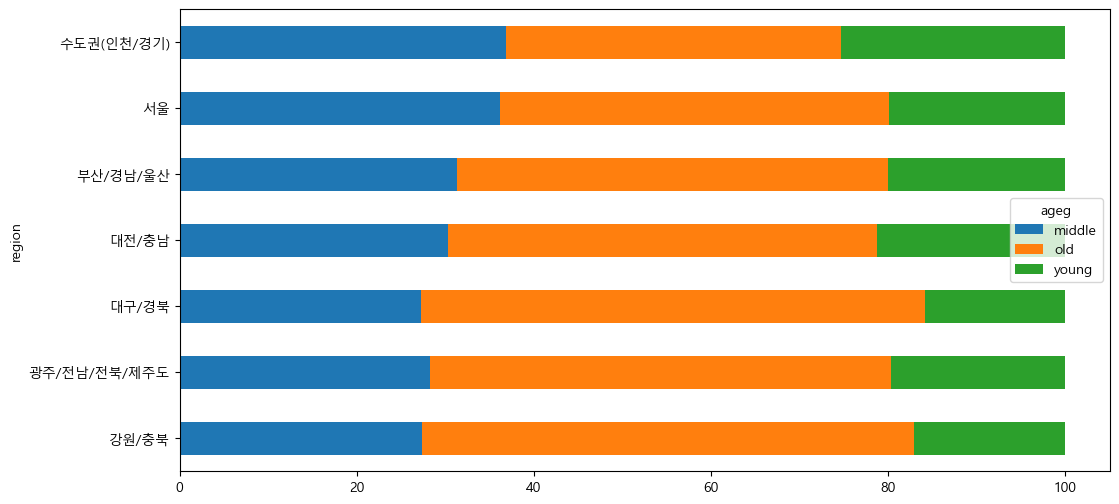

In [30]:
pivot_df.plot.barh(stacked=True); # 정렬 적용 안한 경우

In [32]:
pv=pivot_df.sort_values(by='old', ascending=True)[['young', 'middle', 'old']]  # 정렬을 적용한 경우
pv

ageg,young,middle,old
region,,,
수도권(인천/경기),25.3,36.8,37.9
서울,19.9,36.2,43.9
대전/충남,21.3,30.3,48.4
부산/경남/울산,20.0,31.3,48.7
광주/전남/전북/제주도,19.7,28.3,52.0
강원/충북,17.1,27.4,55.5
대구/경북,15.8,27.2,57.0


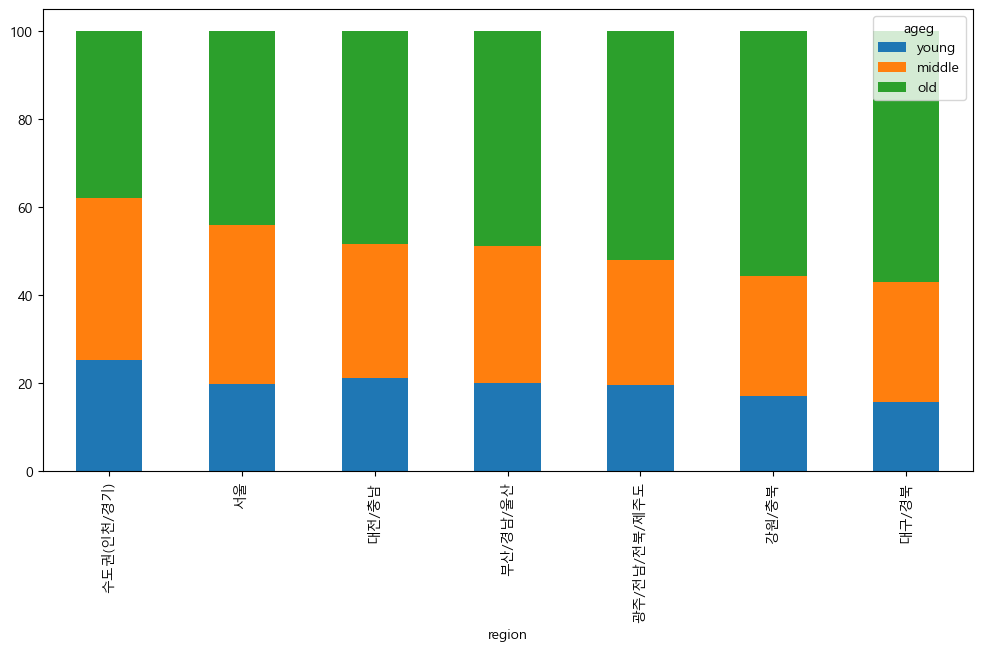

In [33]:
pv.plot.bar(stacked=True);

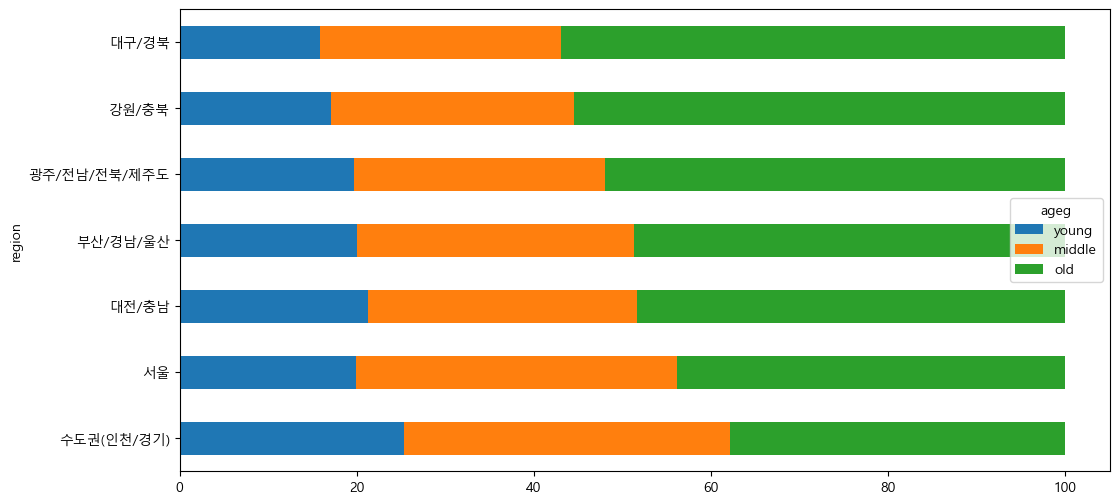

In [34]:
pv.plot.barh(stacked=True);